#Business_Case: Yulu-Hypothesis_Testing

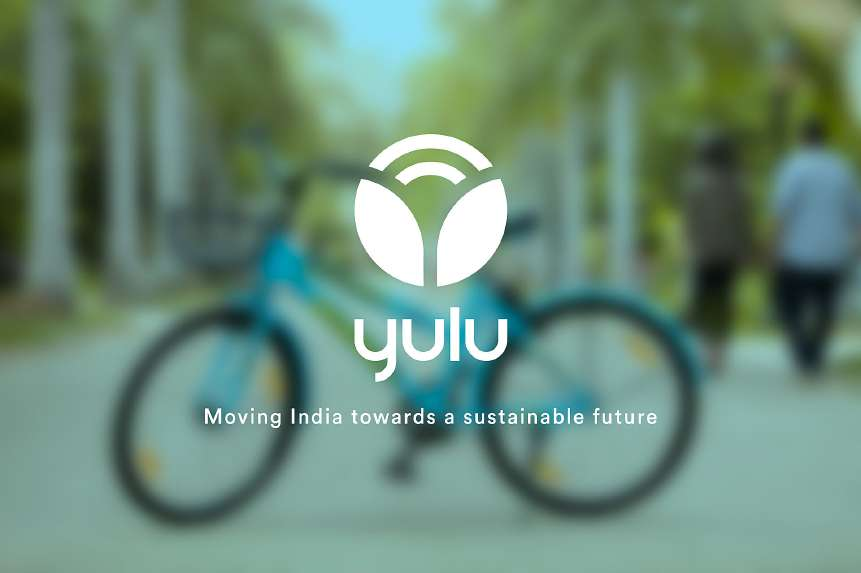

#About Yulu:

Yulu is India’s leading micro-mobility service provider, which oﬀers unique vehicles for the daily commute. Starting oﬀ as a mission to eliminate traﬃc conges on in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate loca ons (including metro sta ons, bus stands, oﬃce spaces, residen al areas, corporate oﬃces, etc) to make those ﬁrst and last miles smooth, aﬀordable, and convenient!

Yulu has recently suﬀered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends.

Speciﬁcally, they want to understand the factors aﬀec ng the demand for these shared electric cycles in the Indian market.

##Defining Business Problem Statement and Analyzing basic metrics Problem Statement:

##Strategic Expansion:
Yulu aims to enter the Indian market strategically to expand its global presence. Understanding the demand factors in this new market is crucial for customizing services and strategies effectively.

##Revenue Recovery:
Yulu has experienced a recent decline in revenue, raising concerns about sustainability and profitability. Analyzing the factors influencing demand for shared electric cycles in the Indian market can provide insights to make informed adjustments and regain profitability.



##Dataset:

###Column Profiling:

●datetime: datetime

●season: season (1: spring, 2: summer, 3: fall, 4: winter)

●holiday : whether day is a holiday or not

●workingday : if day is neither weekend nor holiday is 1, otherwise is 0.

●weather:
o1: Clear, Few clouds, partly cloudy
o2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
o3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
o4: Heavy Rain + Ice Pellets + Thunderstorm + Mist, Snow + Fog

●temp: temperature in Celsius

●atemp: feeling temperature in Celsius

●humidity: humidity

●windspeed: wind speed

●casual: count of casual users

●registered: count of registered users

●count: count of total rental bikes including both casual and registered


#What does ‘good’ look like?

##1. Define the Problem Statement, Import the required Libraries and perform Exploratory Data Analysis.

a. Examine dataset structure, characteristics, and statistical summary.

###Importing all the libraries for analyzing the case study

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('bike_sharing.csv')
df.head()

# Examine dataset structure
print("Dataset Shape:", df.shape)
print("\nDataset Information:")
print(df.info())

# Display statistical summary
print("\nStatistical Summary:")
print(df.describe())

Dataset Shape: (10886, 12)

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB
None

Statistical Summary:
             season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614 

In [ ]:
df.shape

(10886, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

##Detection of missing values -

In [ ]:
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

Insight - There are no null values in the yulu dataset.

##Data type conversion -

In [ ]:
# Type conversion
df['datetime'] = pd.to_datetime(df['datetime'])
df['season'] = df['season'].map(str)
df['holiday'] = df['holiday'].map(str)
df['workingday'] = df['workingday'].map(str)
df['weather'] = df['weather'].map(str)

##Data mapping of categorical columns -

In [ ]:
# Data Mapping
season_mapping = {'1':'spring', '2':'summer', '3':'fall', '4':'winter'}
df["season"] = df["season"].map(lambda x: season_mapping[x])
holiday_mapping = {'0':'no', '1':'yes'}
df["holiday"] = df["holiday"].map(lambda x: holiday_mapping[x])
working_day_mapping = {'0':'no', '1':'yes'}
df["workingday"] = df["workingday"].map(lambda x: working_day_mapping[x])
weather_mapping = {'1':'clear', '2':'partly_clear', '3':'rain', '4':'intense'}
df["weather"] = df["weather"].map(lambda x: weather_mapping[x])

In [ ]:
df

datetime  season holiday workingday weather   temp   atemp  \
0     2011-01-01 00:00:00  spring      no         no   clear   9.84  14.395   
1     2011-01-01 01:00:00  spring      no         no   clear   9.02  13.635   
2     2011-01-01 02:00:00  spring      no         no   clear   9.02  13.635   
3     2011-01-01 03:00:00  spring      no         no   clear   9.84  14.395   
4     2011-01-01 04:00:00  spring      no         no   clear   9.84  14.395   
...                   ...     ...     ...        ...     ...    ...     ...   
10881 2012-12-19 19:00:00  winter      no        yes   clear  15.58  19.695   
10882 2012-12-19 20:00:00  winter      no        yes   clear  14.76  17.425   
10883 2012-12-19 21:00:00  winter      no        yes   clear  13.94  15.910   
10884 2012-12-19 22:00:00  winter      no        yes   clear  13.94  17.425   
10885 2012-12-19 23:00:00  winter      no        yes   clear  13.12  16.665   

       humidity  windspeed  casual  registered  count  
0            81     0.0000       3          13     16  
1            80     0.0000       8          32     40  
2            80     0.0000       5          27     32  
3            75     0.0000       3          10     13  
4            75     0.0000       0           1      1  
...         ...        ...     ...         ...    ...  
10881        50    26.0027       7         329    336  
10882        57    15.0013      10         231    241  
10883        61    15.0013       4         164    168  
10884        61     6.0032      12         117    129  
10885        66     8.9981       4          84     88  

[10886 rows x 12 columns]

In [ ]:
df.describe(include = 'object')

season holiday workingday weather
count    10886   10886      10886   10886
unique       4       2          2       4
top     winter      no        yes   clear
freq      2734   10575       7412    7192

In [ ]:
df.duplicated().any()

False

Insight - There are no duplicated values in the dataset.

In [ ]:
df['datetime'].value_counts()

2011-01-01 00:00:00    1
2012-05-01 21:00:00    1
2012-05-01 13:00:00    1
2012-05-01 14:00:00    1
2012-05-01 15:00:00    1
                      ..
2011-09-02 04:00:00    1
2011-09-02 05:00:00    1
2011-09-02 06:00:00    1
2011-09-02 07:00:00    1
2012-12-19 23:00:00    1
Name: datetime, Length: 10886, dtype: int64

In [ ]:
df['season'].value_counts()

winter    2734
summer    2733
fall      2733
spring    2686
Name: season, dtype: int64

b. Identify missing values and perform Imputation using an appropriate method.

In [ ]:
df['holiday'].value_counts()

no     10575
yes      311
Name: holiday, dtype: int64

c. Identify and remove duplicate records.

In [ ]:
df['weather'].value_counts()

clear           7192
partly_clear    2834
rain             859
intense            1
Name: weather, dtype: int64

In [ ]:
df['workingday'].value_counts()

yes    7412
no     3474
Name: workingday, dtype: int64

In [ ]:
df['temp'].value_counts().head()

14.76    467
26.24    453
28.70    427
13.94    413
18.86    406
Name: temp, dtype: int64

In [ ]:
df['atemp'].value_counts().head()

31.060    671
25.760    423
22.725    406
20.455    400
26.515    395
Name: atemp, dtype: int64

In [ ]:
df['humidity'].value_counts().head()

88    368
94    324
83    316
87    289
70    259
Name: humidity, dtype: int64

In [ ]:
df['windspeed'].value_counts().head()

0.0000     1313
8.9981     1120
11.0014    1057
12.9980    1042
7.0015     1034
Name: windspeed, dtype: int64

In [ ]:
df['casual'].value_counts().head()

0    986
1    667
2    487
3    438
4    354
Name: casual, dtype: int64

In [ ]:
df['registered'].value_counts().head()

3    195
4    190
5    177
6    155
2    150
Name: registered, dtype: int64

In [ ]:
df['count'].value_counts().head()

5    169
4    149
3    144
6    135
2    132
Name: count, dtype: int64

#Univariate Analysis -

##Barplots/countplots of all the categorical variables -

<ipython-input-27-dcf414c9969d>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=df, x="season",kind="count",palette = 'rocket')


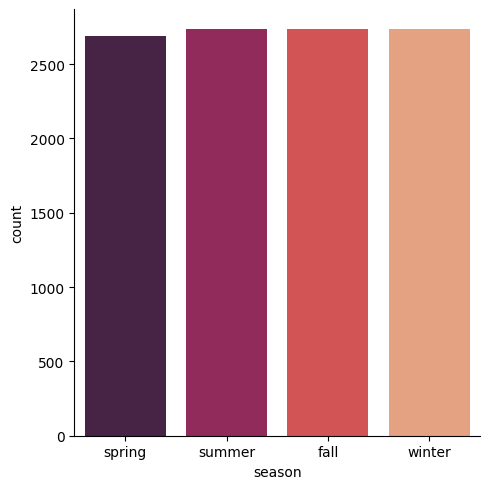

In [ ]:
sns.catplot(data=df, x="season",kind="count",palette = 'rocket')
plt.show()

Insight - Analysis of the catplot reveals that the peak season was the
winter season.

<ipython-input-28-692c1a860a7e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df['holiday'],palette = "coolwarm")


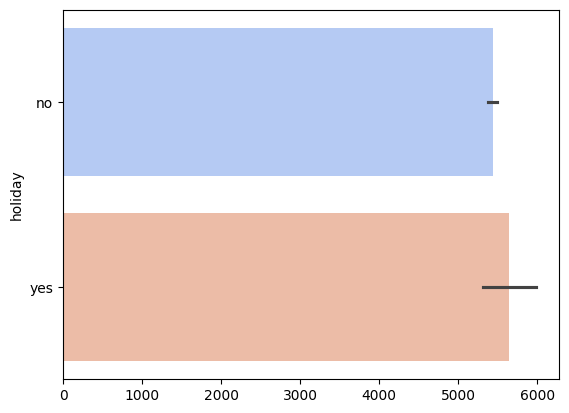

In [ ]:
sns.barplot(df['holiday'],palette = "coolwarm")
plt.show()

Insight - Based on the barplot above, the data have holidays surpassing
5500.

<ipython-input-29-3057af994383>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'workingday',data = df,palette = "ch:s=-.2,r=.6")


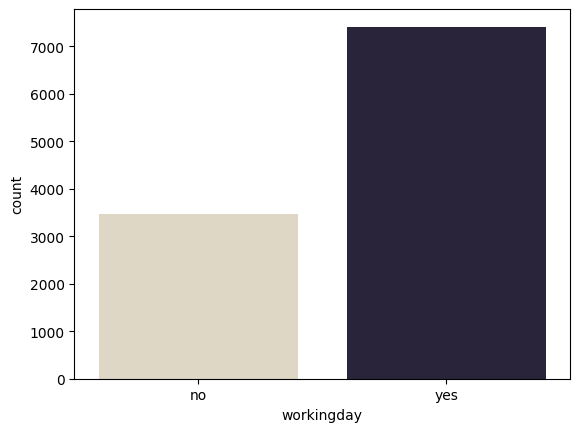

In [ ]:
sns.countplot(x = 'workingday',data = df,palette = "ch:s=-.2,r=.6")
plt.show()

Inisight - Observing the barplot above, it's noticeable that we have
workingdays surpassing the 7000 mark.

#Distribution plots of all the continuous variables-

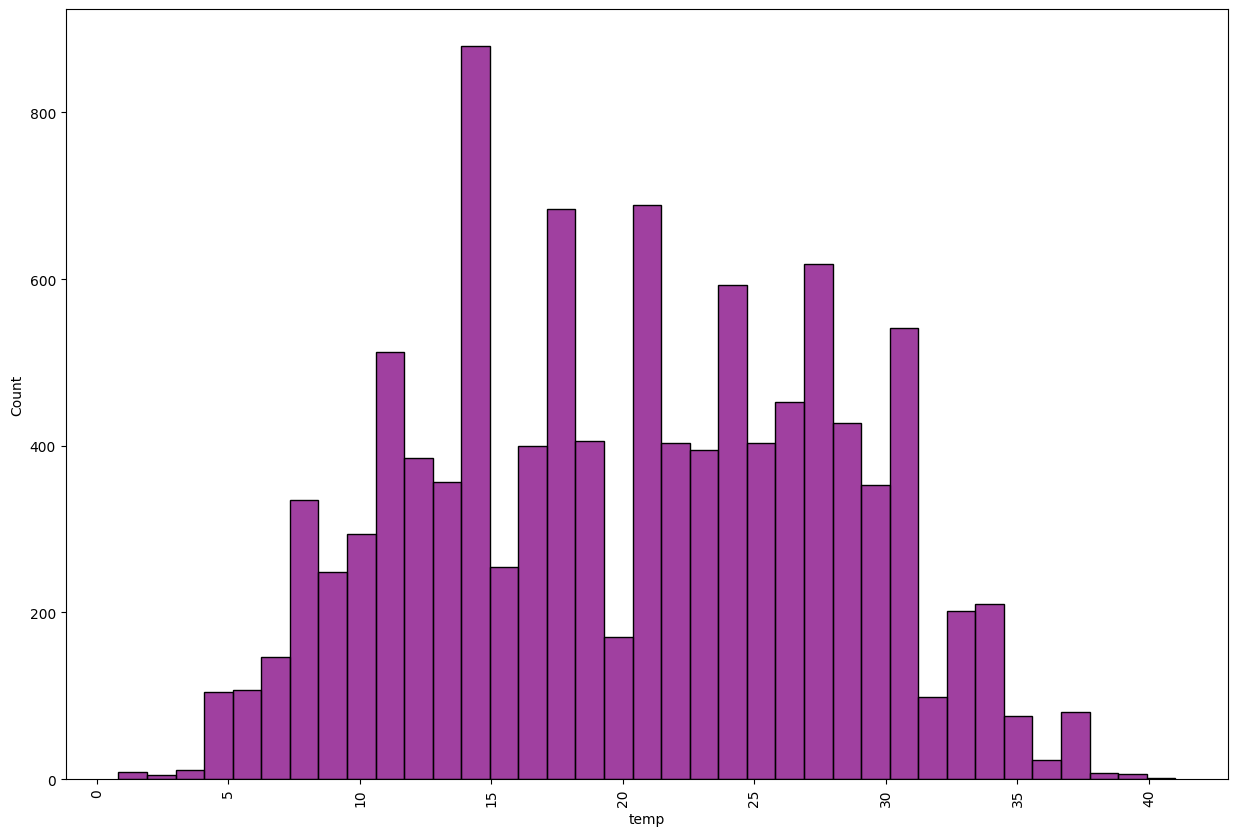

In [ ]:
plt.figure(figsize = (15,10))
sns.histplot(x = 'temp',data = df,color = "purple")
plt.xticks(rotation = 90)
plt.show()

Insight - During the year 2011 & 2012 we found that most the time the
temperature was found to be 14 degree celcius.

<ipython-input-31-33c8229e2bb9>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.atemp,color = "red")


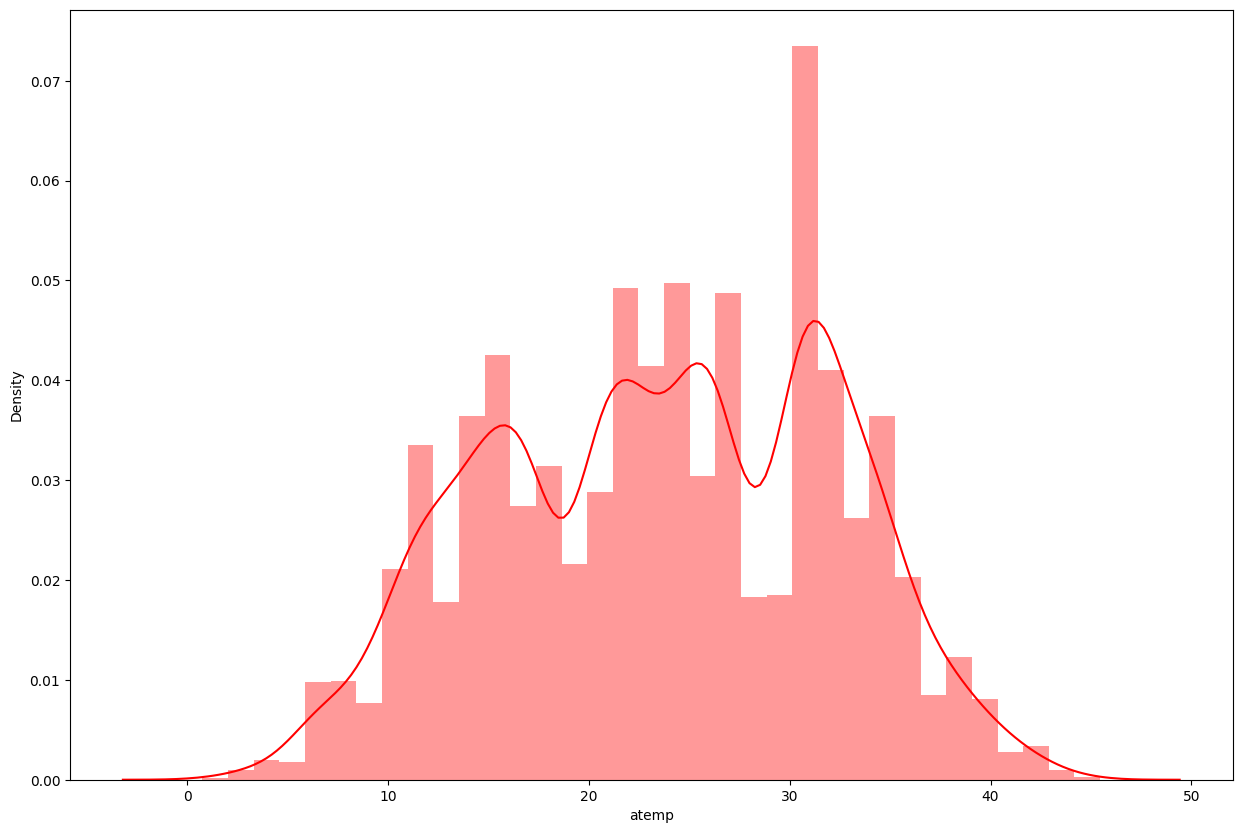

In [ ]:
plt.figure(figsize = (15,10))
sns.distplot(df.atemp,color = "red")
plt.show()

Insight - The majority of the time feeling temperature was
approximately 30 degrees celcius.

<ipython-input-32-5a6020a40919>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['humidity'],color = "brown",shade = True)


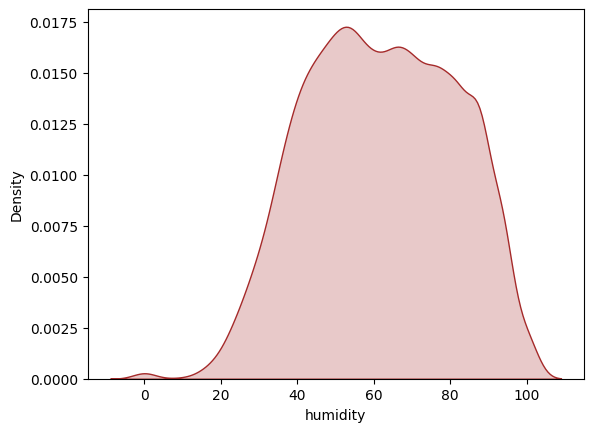

In [ ]:
sns.kdeplot(df['humidity'],color = "brown",shade = True)
plt.show()

Insight - Most of the time the humidity levels range between 40% and
60%.

<ipython-input-33-22e13662784a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.casual,color = 'cyan')


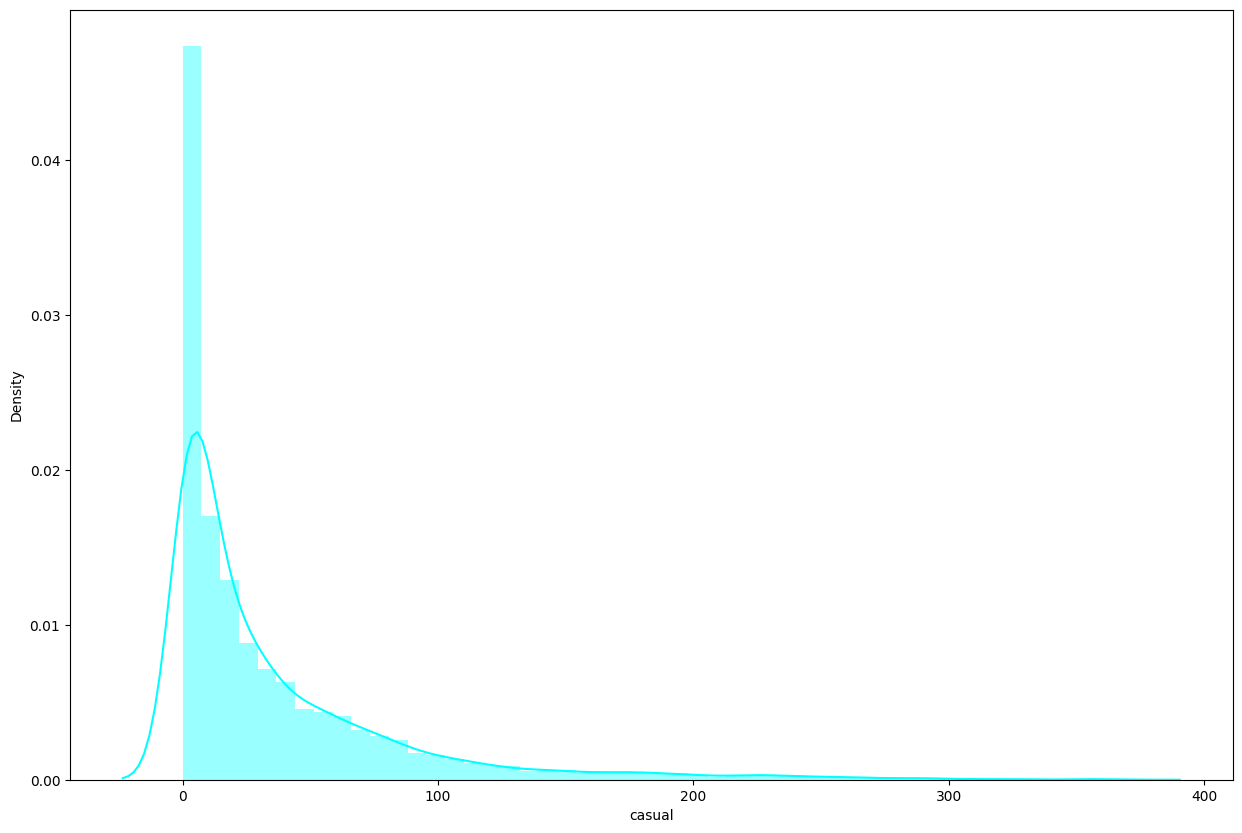

In [ ]:
plt.figure(figsize = (15,10))
sns.distplot(df.casual,color = 'cyan')
plt.show()

Insight - The count of casual bicycle users is found to be below 100
people.

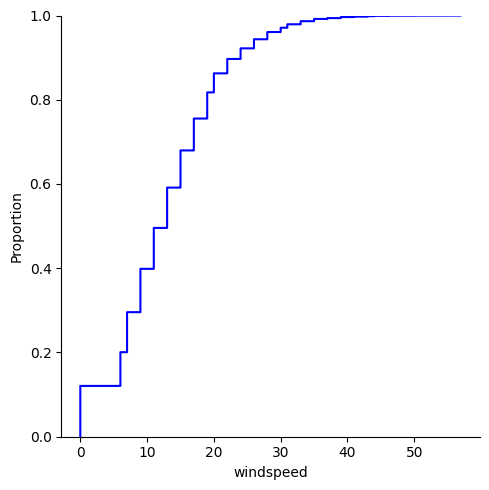

In [ ]:
sns.displot(df, x="windspeed", kind="ecdf",color = 'blue')

Insight - The majority of the time the wind speed was around 40.

<Figure size 1000x800 with 0 Axes>

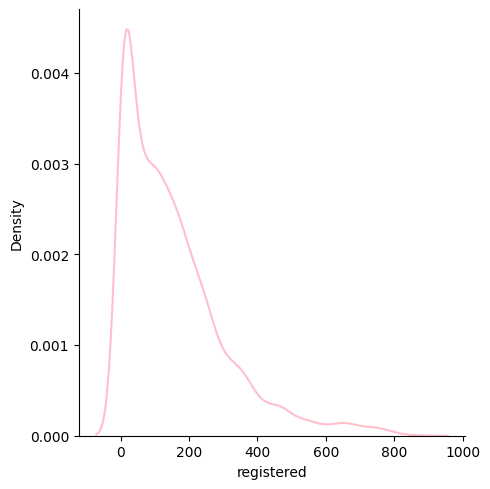

In [ ]:
plt.figure(figsize = (10,8))
sns.displot(df,x = 'registered',color = "pink",kind = 'kde')
plt.show()

Insight - The majority of registered users fall within the count range of
0-200.

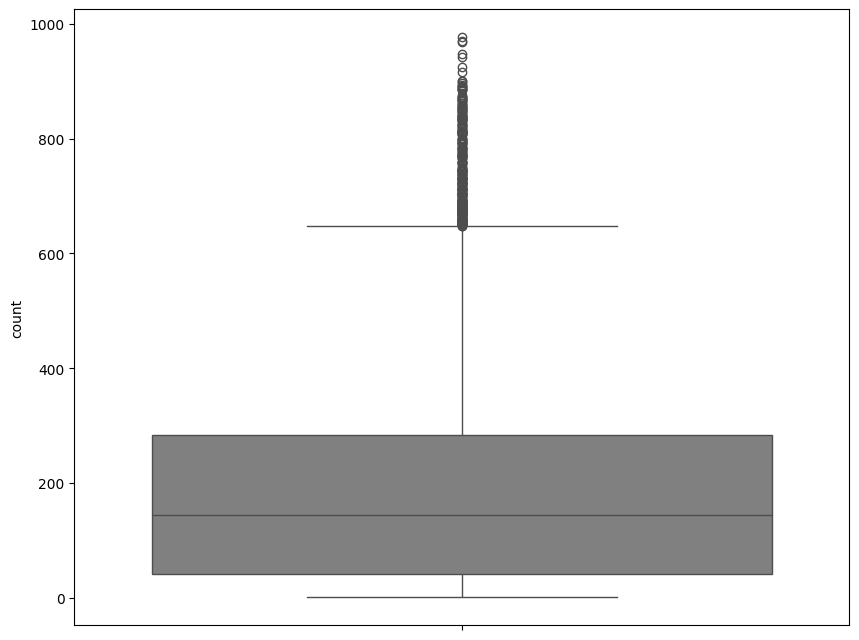

In [ ]:
plt.figure(figsize = (10,8))
sns.boxplot(df, y="count",color = 'grey')
plt.show()

Insight - The majority of total yulu bicycle users fall within the count
range of 0-300.

#Bivariate Analysis -

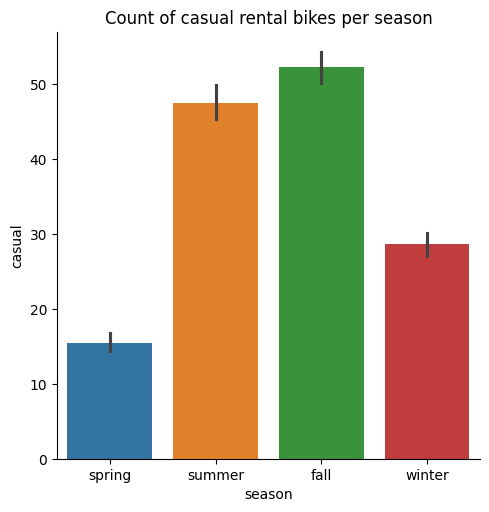

In [ ]:
sns.catplot(data=df, x='season', y='casual', kind='bar', hue='season', legend=False)
plt.title('Count of casual rental bikes per season')
plt.show()


Insight - The catplot above distinctly reveals that the fall season attracts
the highest number of casual users renting bicycles.

<ipython-input-38-9ba9ed97d35b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=df, x='season', y='registered', kind='bar', palette='cubehelix')


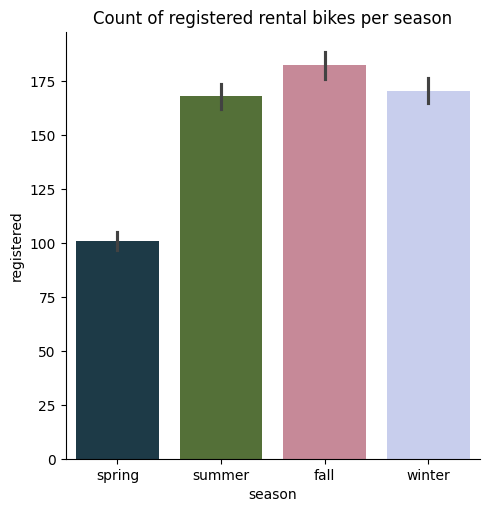

In [ ]:
sns.catplot(data=df, x='season', y='registered', kind='bar', palette='cubehelix')
plt.title('Count of registered rental bikes per season')
plt.show()


Insight - Similar to casual users, the count of registered users also peaks
during the fall season.

<ipython-input-39-c8f95b76c0a1>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=df, x='season', y='count', kind='box', palette='dark:salmon')


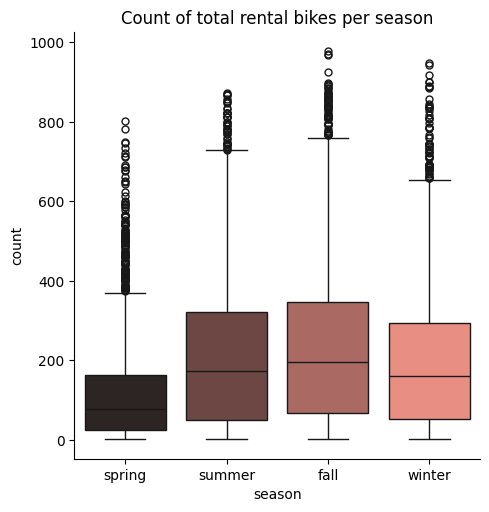

In [ ]:
sns.catplot(data=df, x='season', y='count', kind='box', palette='dark:salmon')
plt.title('Count of total rental bikes per season')
plt.show()


Insight - We found that maximum users of yulu bicycles rent the
bicycles during fall season.

<ipython-input-40-279045c50a96>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=df, x='weather', y='registered', palette='coolwarm', errorbar="p")


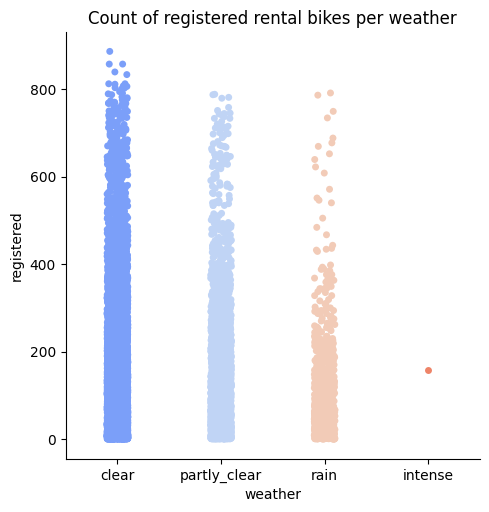

In [ ]:
sns.catplot(data=df, x='weather', y='registered', palette='coolwarm', errorbar="p")
plt.title('Count of registered rental bikes per weather')
plt.show()

Insight - Clear weather attracts over 150 registered users to rent
bicycles, making it the most popular weather condition among all.

<ipython-input-41-da86cb3d72b8>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=df, y='weather', x='casual', palette='magma', errorbar=("pi", 95))


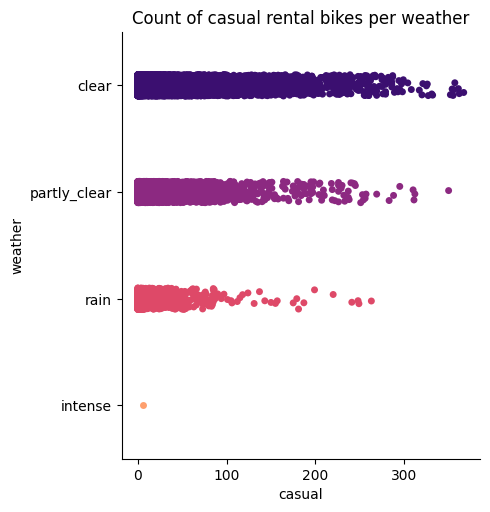

In [ ]:
sns.catplot(data=df, y='weather', x='casual', palette='magma', errorbar=("pi", 95))
plt.title('Count of casual rental bikes per weather')
plt.show()

Insight - Similar to registered users clear weather attracts over 50 casual
users to rent bicycles, making it the most popular weather condition
among all.

<ipython-input-42-702d8350cd36>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=df, x='weather', y='count', palette='ch:s=-.2,r=.6', errorbar=("p"))


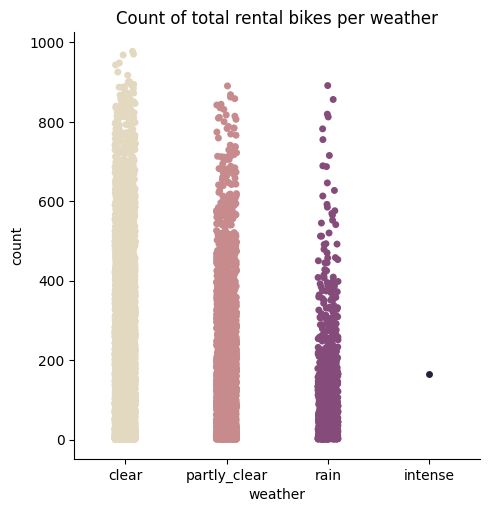

In [ ]:
sns.catplot(data=df, x='weather', y='count', palette='ch:s=-.2,r=.6', errorbar=("p"))
plt.title('Count of total rental bikes per weather')
plt.show()

Insight - The boxplot analysis suggests a preference for renting bicycles
during clear weather. Notably, outliers were observed above 700 in clear
weather, above 600 in partly clear conditions, and above 300 during
rainy weather.

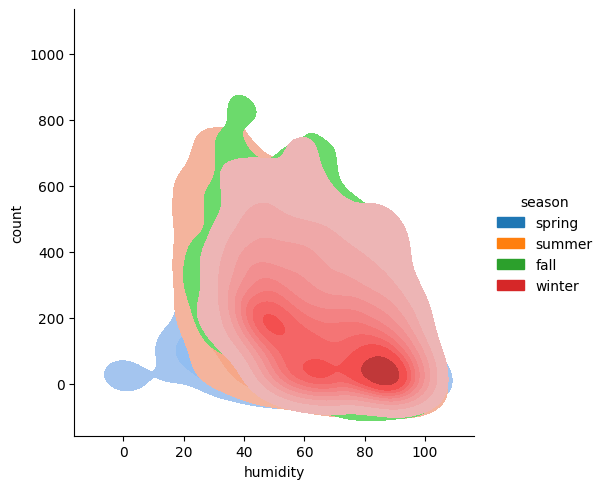

In [ ]:
sns.displot(df, x="humidity",y = 'count', hue="season", kind="kde", fill=True)
plt.show()

Insight - The distplot reveals that the peak preference for bicycle rentals
occurs when the season is fall, and humidity levels hover around 40,
with the highest concentration of users.

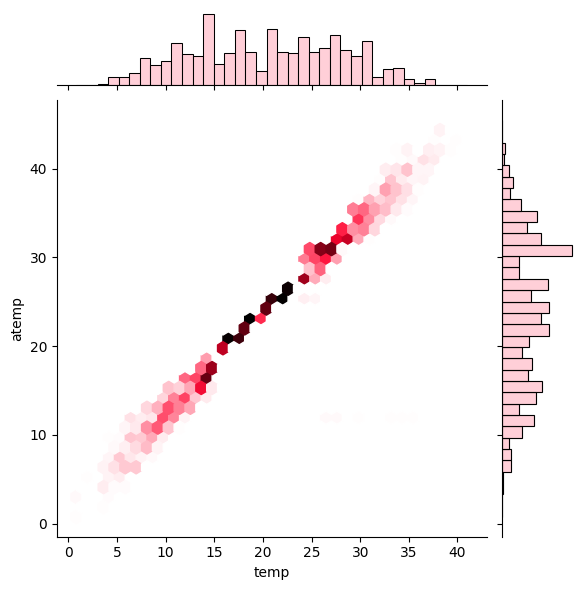

In [ ]:
sns.jointplot(data=df, x="temp", y="atemp",color = "pink",kind="hex")
plt.show()

Insight - We can see normal distribution between temperature and
feeling temperature.

<ipython-input-45-d1b479ea8d52>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y="casual", x='holiday', ax=axes[0], palette="crest")
<ipython-input-45-d1b479ea8d52>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y="registered", x='holiday', ax=axes[1], palette="icefire")
<ipython-input-45-d1b479ea8d52>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y="count", x='holiday', ax=axes[2], palette="Spectral")


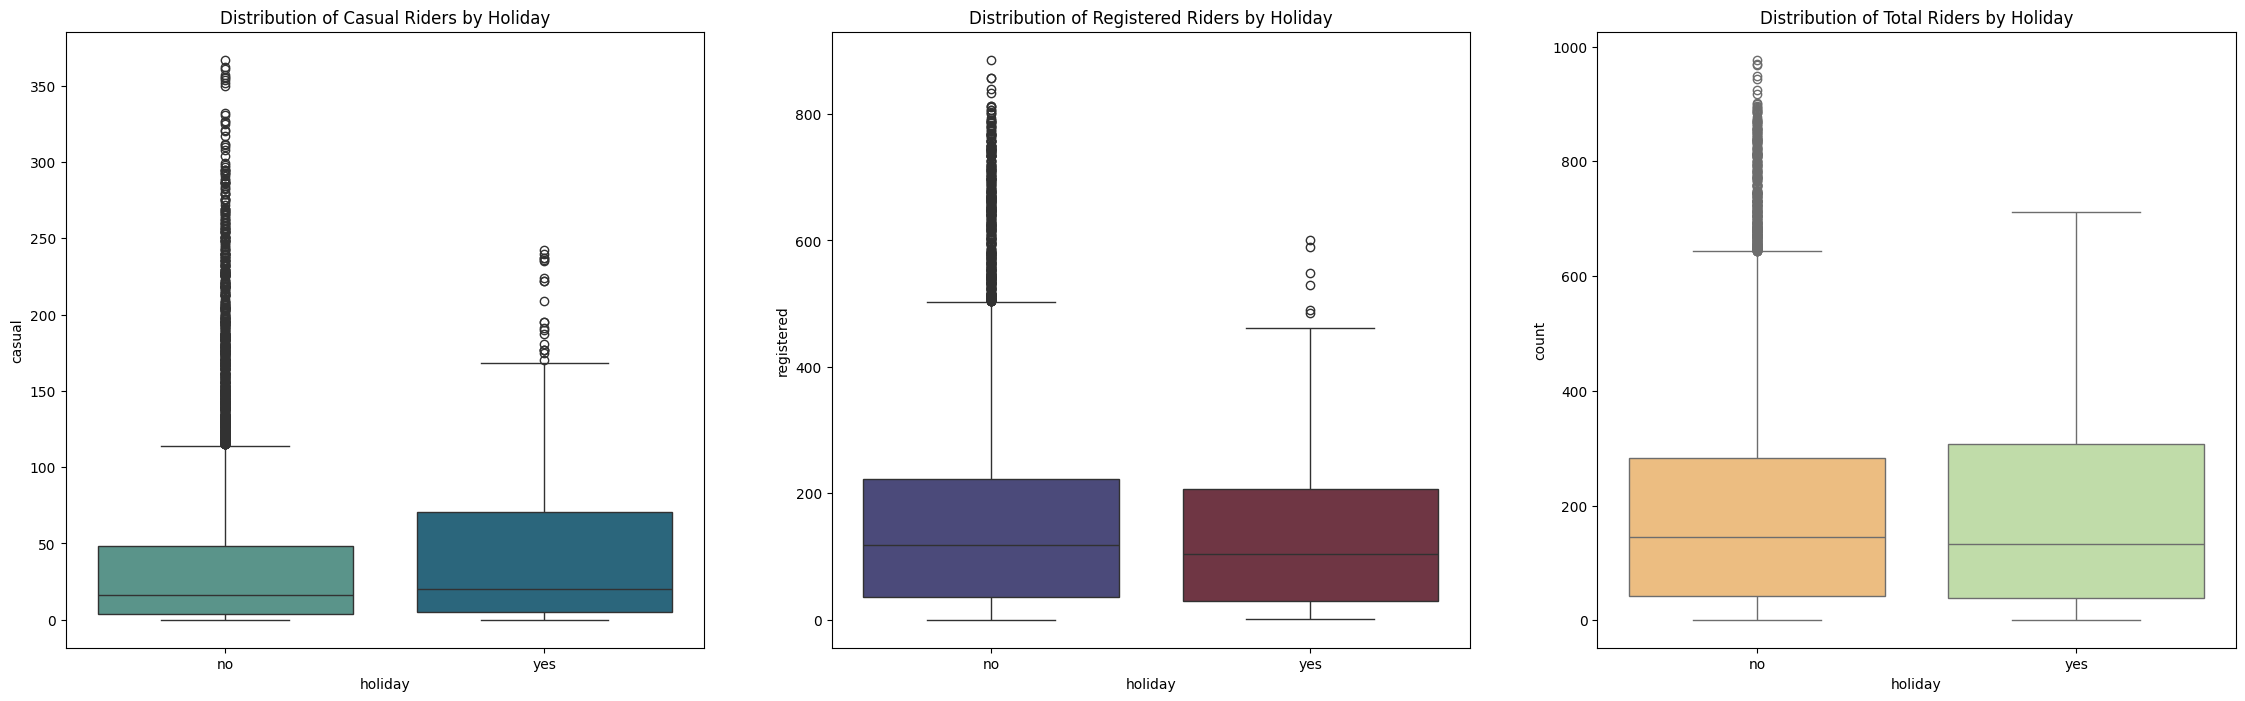

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(28, 8))

sns.boxplot(data=df, y="casual", x='holiday', ax=axes[0], palette="crest")
axes[0].set_title('Distribution of Casual Riders by Holiday')

sns.boxplot(data=df, y="registered", x='holiday', ax=axes[1], palette="icefire")
axes[1].set_title('Distribution of Registered Riders by Holiday')

sns.boxplot(data=df, y="count", x='holiday', ax=axes[2], palette="Spectral")
axes[2].set_title('Distribution of Total Riders by Holiday')

plt.show()


Insights -
1. Distribution of Casual Riders by Holiday
We found that majority of casual riders prefer to rent when there is a holiday.
We found the outliers above 150 when there is a holiday and above 100 when there is no holiday.

2. Distribution of Registered Riders by Holiday
We found that majority of registered riders prefer to rent when there is no holiday.
We found the outliers between 500 and 600 when there is a holiday and
between 500 and 900 when there is no holiday.

3. Distribution of Total Riders by Holiday We found that majority of total riders prefer to rent when there is a holiday.
we found the outliers above between 600 and 1000 when it's a weekday.

<ipython-input-46-6277cc8d72a8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y="casual", x='workingday', ax=axes[0], palette="coolwarm")
<ipython-input-46-6277cc8d72a8>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y="registered", x='workingday', ax=axes[1], palette="viridis")
<ipython-input-46-6277cc8d72a8>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y="count", x='workingday', ax=axes[2], palette="YlOrBr")


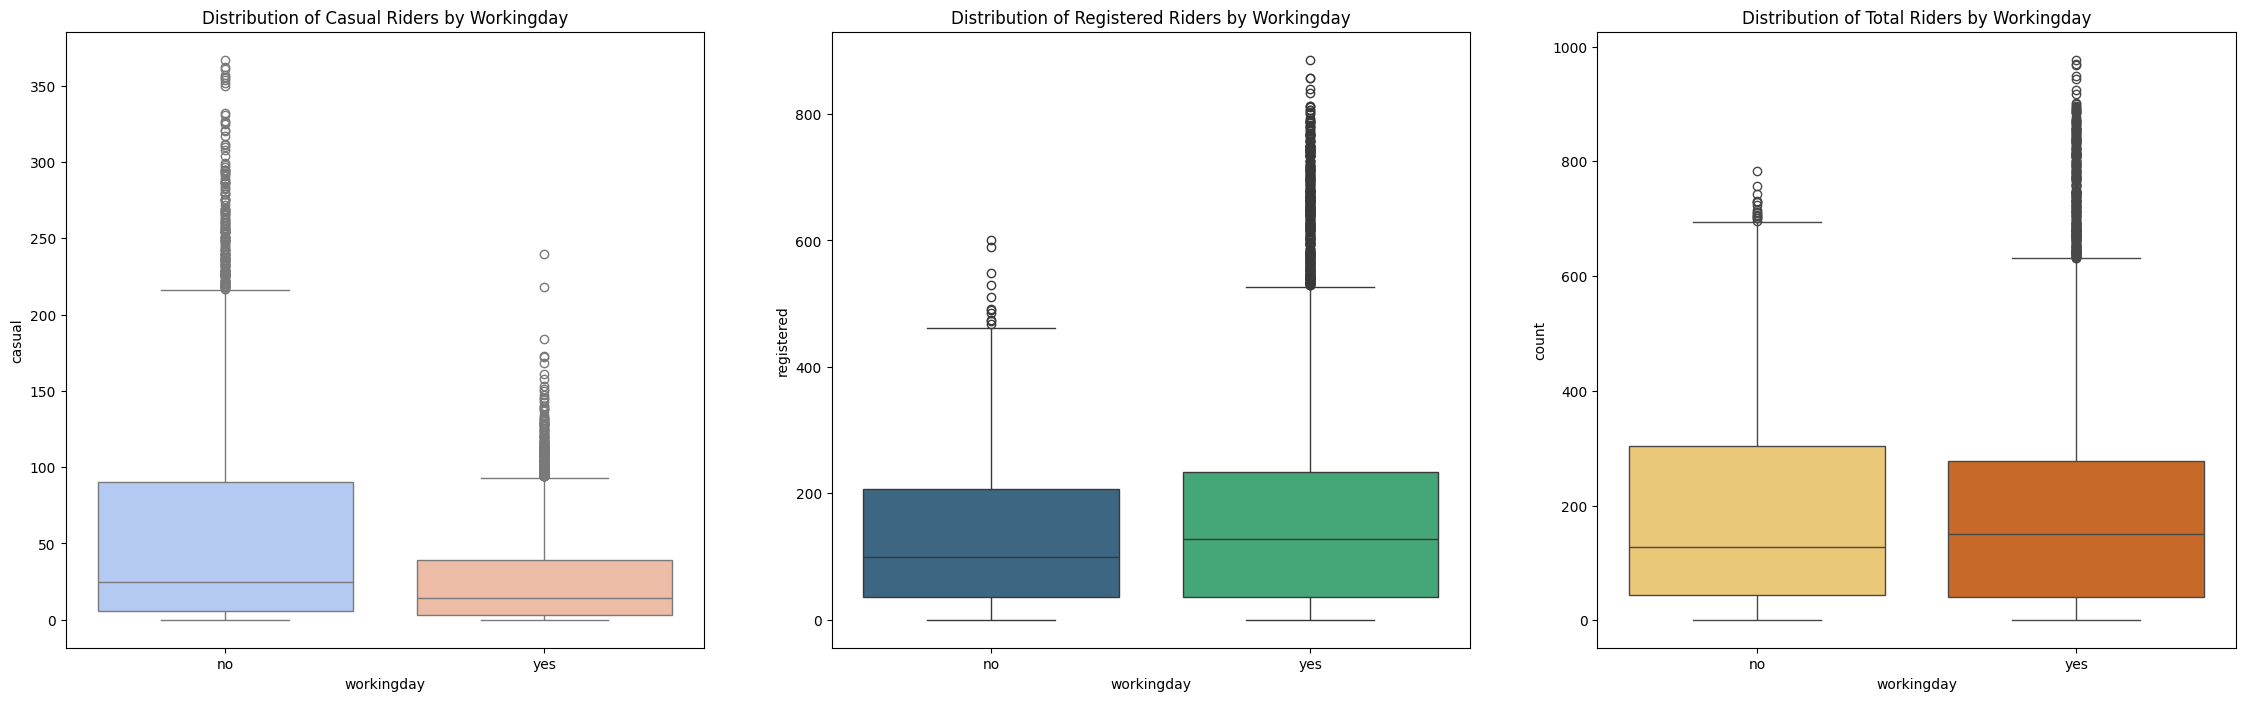

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(28, 8))

sns.boxplot(data=df, y="casual", x='workingday', ax=axes[0], palette="coolwarm")
axes[0].set_title('Distribution of Casual Riders by Workingday')

sns.boxplot(data=df, y="registered", x='workingday', ax=axes[1], palette="viridis")
axes[1].set_title('Distribution of Registered Riders by Workingday')

sns.boxplot(data=df, y="count", x='workingday', ax=axes[2], palette="YlOrBr")
axes[2].set_title('Distribution of Total Riders by Workingday')

plt.show()

Insights -
1. Distribution of Casual Riders by WorkingdayWe found that majority of casual riders prefer to rent when there is no
workingday.
We found the outliers above 200 when there is a holiday and above 100 when there is a workingday.

2. Distribution of Registered Riders by Workingday
We found that majority of registered riders prefer to rent when there is a workingday.
We found the outliers between 450 and 600 when there is a holiday and
between 550 and 900 when there is no holiday.

3. Distribution of Total Riders by Workingday
We found that majority of total riders prefer to rent when there is a Weekend or holiday.
we found the outliers above between 600 and 1000 when it's a weekday and
between 700 and 800 when there is holiday.

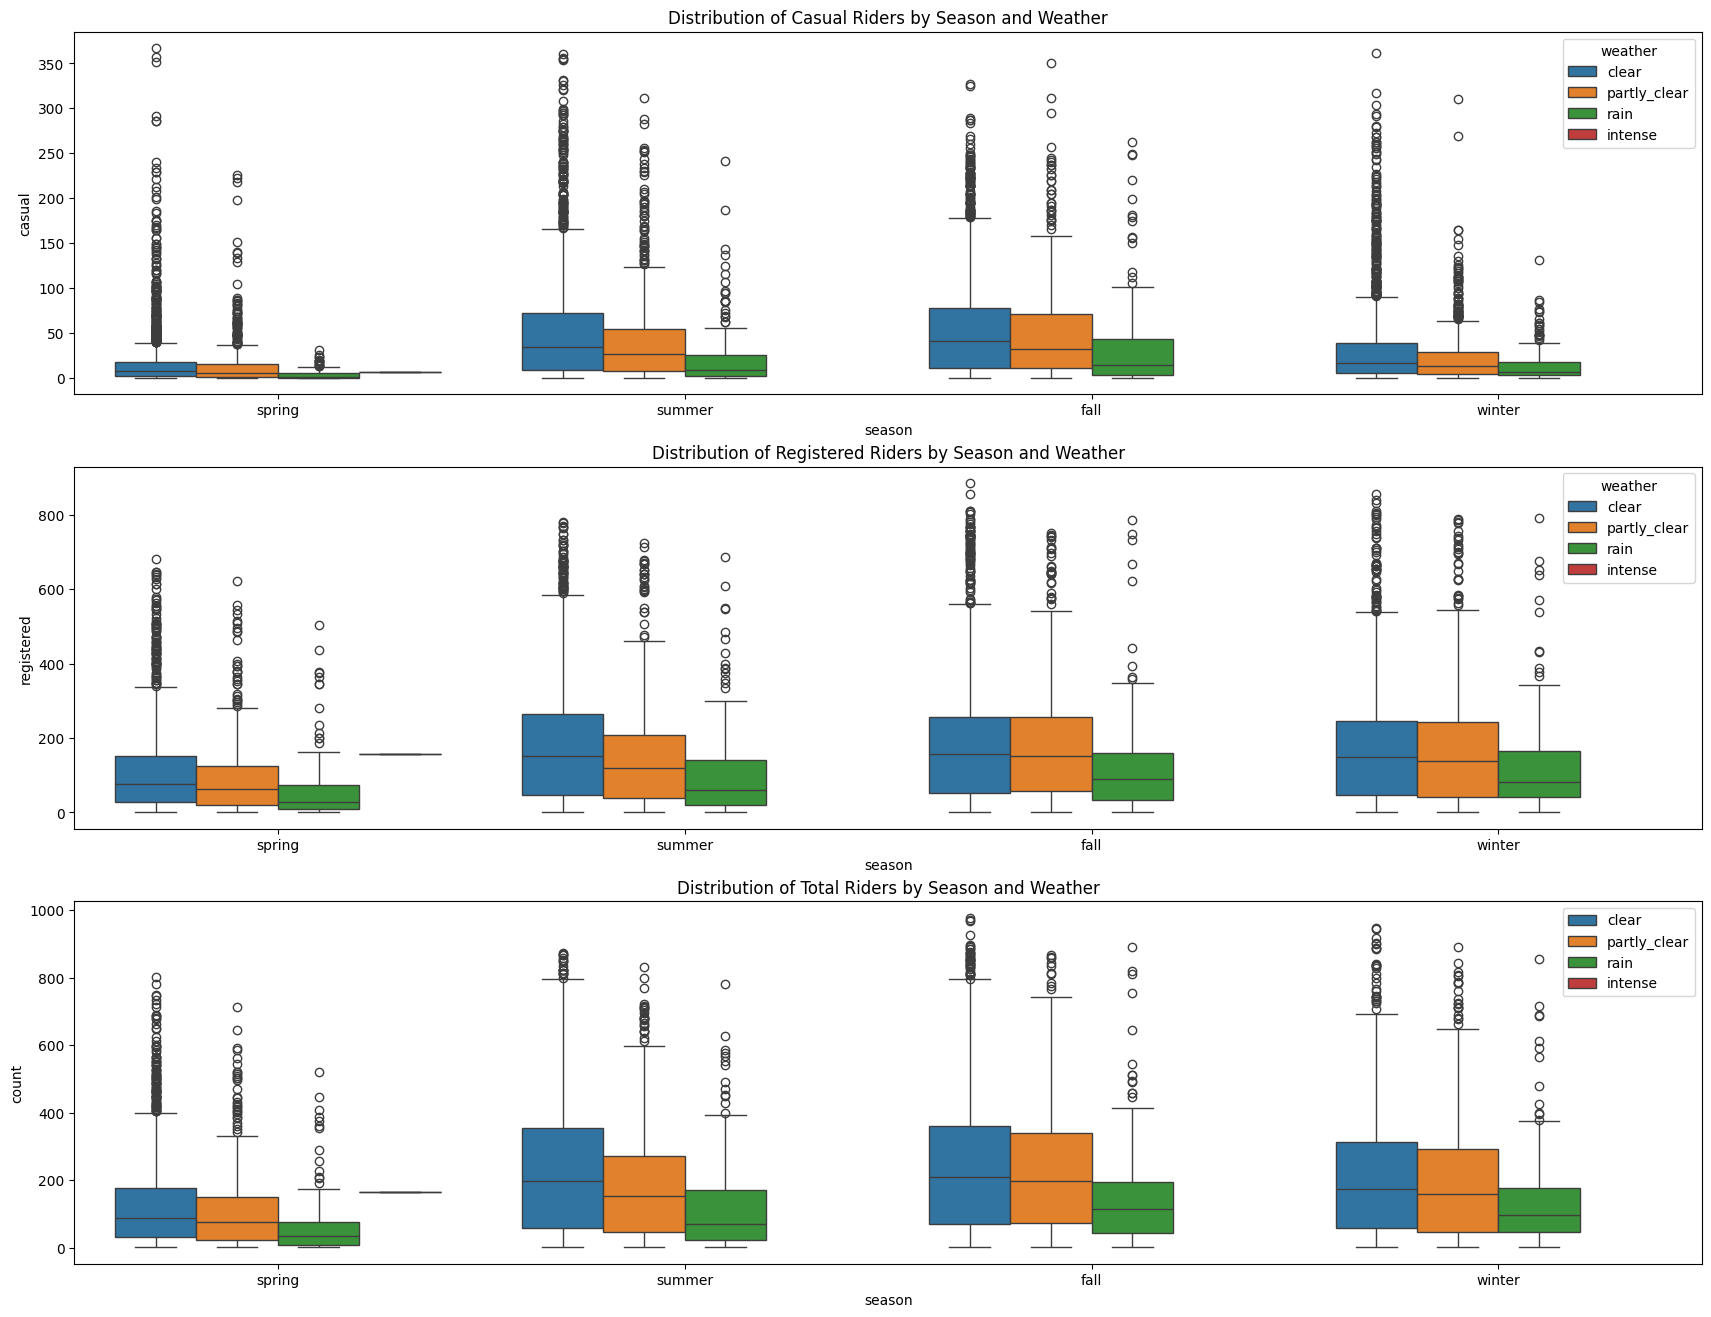

In [ ]:
fig,axes=plt.subplots(3,1,figsize=(21,16))
sns.boxplot(data=df, y="casual", x = 'season', hue = 'weather', ax=axes[0])
axes[0].set_title('Distribution of Casual Riders by Season and Weather')
sns.boxplot(data=df, y="registered", x = 'season', hue = 'weather', ax=axes[1])
axes[1].set_title('Distribution of Registered Riders by Season and Weather')
sns.boxplot(data=df, y="count", x = 'season', hue = 'weather', ax=axes[2])
axes[2].set_title('Distribution of Total Riders by Season and Weather')
plt.legend(loc='upper right')
plt.show()

Insight - In the above 3 subplots we have have plotted boxplot for
distribution of casual riders, registered riders & total riders by Season
and Weather to find the outliers.

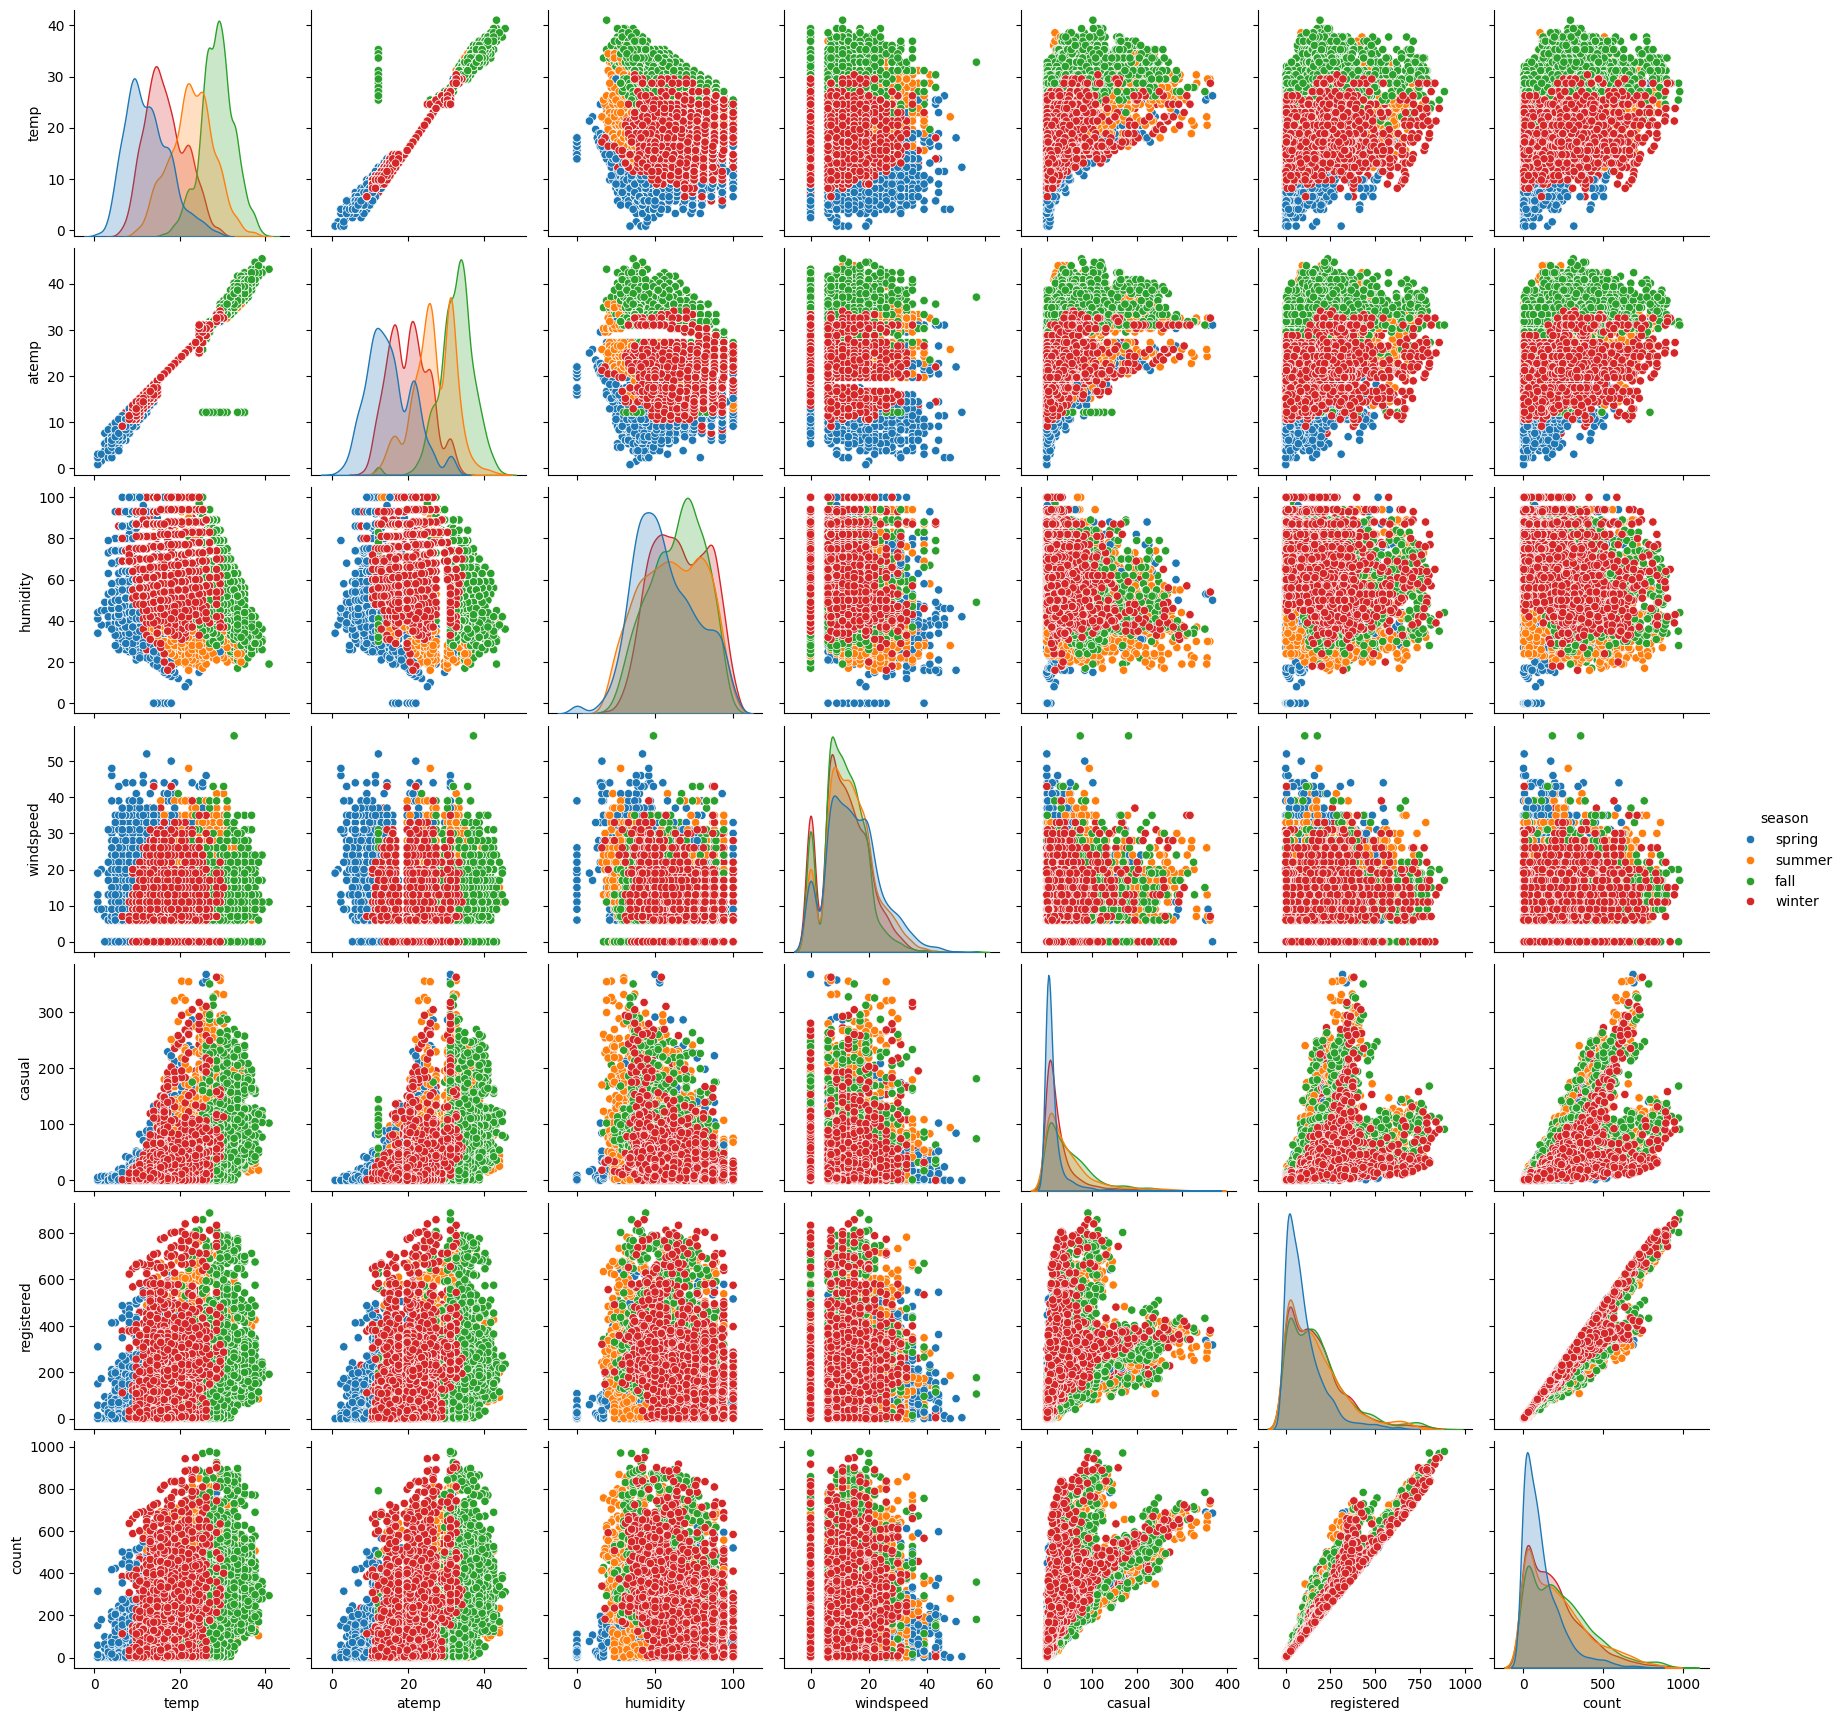

In [ ]:
sns.pairplot(df,hue = 'season')
plt.show()

Insight - We have plotted the pairplot to see the relation between all the

#Hypothesis Testing -

In [ ]:
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
from scipy.stats import shapiro, levene, f_oneway
from scipy.stats import probplot
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot

##Question 1. Effect of Holiday on the number of electric cycles rented.

Null Hypothesis(H0): Holiday has no effect on the number of electric cycles rented
Alternate Hypothesis(Ha): Holiday has effect on the number of electric cycles rented
significance level = 0.05 or 5%
Test statistic - 2 Sample Independent T-test

In [ ]:
holiday_no = np.array(df[df.holiday == 'no']['count'])
holiday_yes = np.array(df[df.holiday == 'yes']['count'])
alpha = 0.05
t_stat, p_value = ttest_ind(holiday_no, holiday_yes)
print('t-stat', t_stat)
print('p-value', p_value)
if p_value < alpha:
    print("Reject H0, Holiday has effect on the number of electric cycles rented")
else:
    print("Fail to reject H0, Holiday has no effect on the number of electric cycles rented")


t-stat 0.5626388963477119
p-value 0.5736923883271103
Fail to reject H0, Holiday has no effect on the number of electric cycles rented


Insight - The p-value exceeding the alpha (significance level) indicates a
failure to reject the null hypothesis. Consequently, we conclude that
holidays have no discernible effect on the number of bicycles rented.

Question 2. Effect of Working day on the
number of electric cycles rented.

Null hypothesis(H0): Workingday has no effect on the number of electric cycles rented
Alternate hypothesis(Ha): Workingday has effect on the number of electric cycles
rented
Significance level = 0.05 or 5%
Test statistic - 2 Sample Independent T-test

In [ ]:
workingday_no = np.array(df[df.workingday == 'no']['count'])
workingday_yes = np.array(df[df.workingday == 'yes']['count'])
alpha = 0.05
t_stat,p_value = ttest_ind(holiday_no,holiday_yes)
print('t-stat',t_stat)
print('p-value',p_value)
if p_value < alpha:
  print("Reject H0, Working day has effect on the number of electric cycles")
else:
  print("Fail to reject H0, Working day has no effect on the number of electric")

t-stat 0.5626388963477119
p-value 0.5736923883271103
Fail to reject H0, Working day has no effect on the number of electric


Insight - Since the p-value is greater than alpha, we fail to reject the null
hypothesis. Consequently, we can conclude that Working Day has no
significant effect on the number of electric cycles rented.

#Question 3. Check if there any significant difference between the no. of bike rides on Weekdays and Weekends.

Null hypothesis(H0): There is no significant difference between the no. of bike rides on Weekdays and Weekends

Alternate hypothesis(Ha): There is significant difference between the no. of bike rides on Weekdays and Weekends

Significance level = 0.05 or 5%

Test statistic - 2 Sample Independent T-test

In [ ]:
workingday_yes = np.array(df[df.workingday == 'yes']['count'])
holiday_yes = np.array(df[df.holiday == 'yes']['count'])
alpha = 0.05
t_stat,p_value = ttest_ind(holiday_no,holiday_yes)
print('t-stat',t_stat)
print('p-value',p_value)
if p_value < alpha:
  print("Reject H0, There is significant difference between the no. of bike of rides on Weekdays and Weekends")
else:
  print("Fail to reject H0, There is no significant difference between the no. of bike rides on Weekdays and Weekends")

t-stat 0.5626388963477119
p-value 0.5736923883271103
Fail to reject H0, There is no significant difference between the no. of bike rides on Weekdays and Weekends


Insight - The calculated p-value (0.5737) surpasses the alpha threshold
(0.05), leading to the failure to reject the null hypothesis. Consequently,
we can conclude that there is no significant difference between the
number of bike rides on weekdays and weekends.

#Question 4. Check if the demand of bicycles on rent is the same for different Weather conditions.

##Step 1. Formulating Null Hypothesis (H0) and Alternate Hypothesis (H1)

Null hypothesis(H0): There is no significant difference in the demand of bicycles for different weather conditions

Alternate hypothesis(Ha): There is significant difference in the demand of bicycles for different weather conditions

##Step 2. Select an appropriate test - One-way ANOVA test

In [ ]:
clear = np.array(df[df['weather'] == 'clear']['count'])
partly_clear = np.array(df[df['weather'] == 'partly_clear']['count'])
rain = np.array(df[df['weather'] == 'rain']['count'])
intense = np.array(df[df['weather'] == 'intense']['count'])

##Step 3. Check assumptions of the test

####i. Normality

1) Clear weather

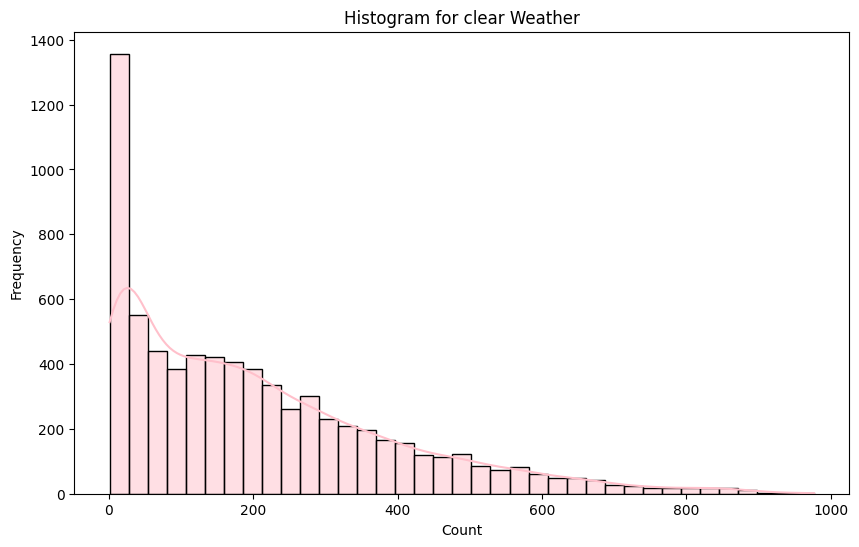

In [ ]:
# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(clear, kde = True, color = 'pink')
plt.title(f'Histogram for clear Weather')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.show()

<Figure size 1000x600 with 0 Axes>

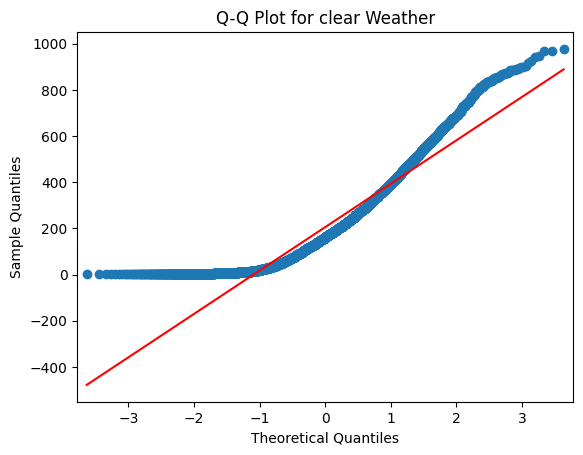

In [ ]:
plt.figure(figsize=(10, 6))
qqplot(clear, line = 's')
plt.title(f'Q-Q Plot for clear Weather')
plt.show()

In [ ]:
# Shapiro-Wilk's test
stat, p_value = shapiro(clear)
print(f'Shapiro-Wilk Test p-value for clear Weather: {p_value}')

Shapiro-Wilk Test p-value for clear Weather: 0.0


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


####2) Partly clear weather

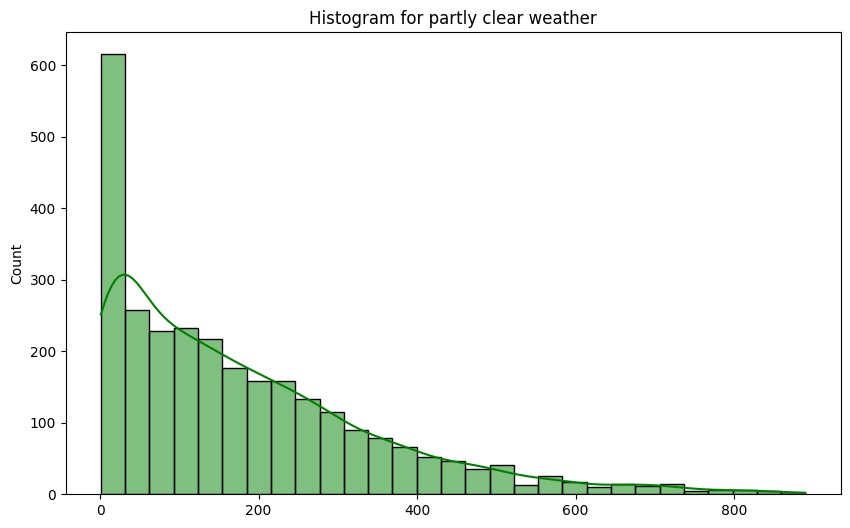

In [ ]:
plt.figure(figsize = (10,6))
sns.histplot(partly_clear,kde = True,color = 'green')
plt.title('Histogram for partly clear weather')
plt.show()

<Figure size 1000x600 with 0 Axes>

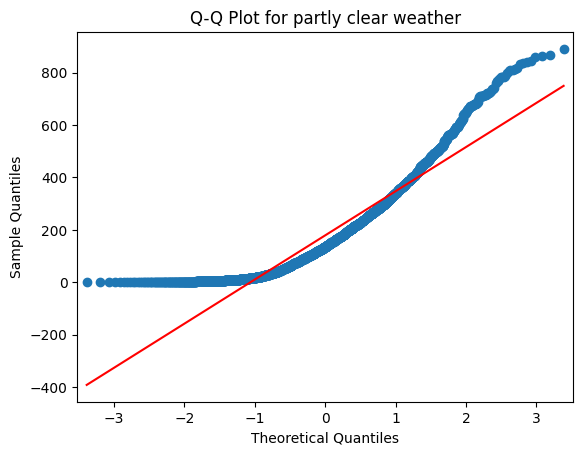

In [ ]:
plt.figure(figsize = (10,6))
qqplot(partly_clear, line = 's')
plt.title('Q-Q Plot for partly clear weather')
plt.show()

In [ ]:
# Shapiro-Wilk's test
stat,p_value = shapiro(partly_clear)
print(f'Shapiro-Wilk Test p-value for clear Weather: {p_value}')

Shapiro-Wilk Test p-value for clear Weather: 9.781063280987223e-43


###3) Rainy weather

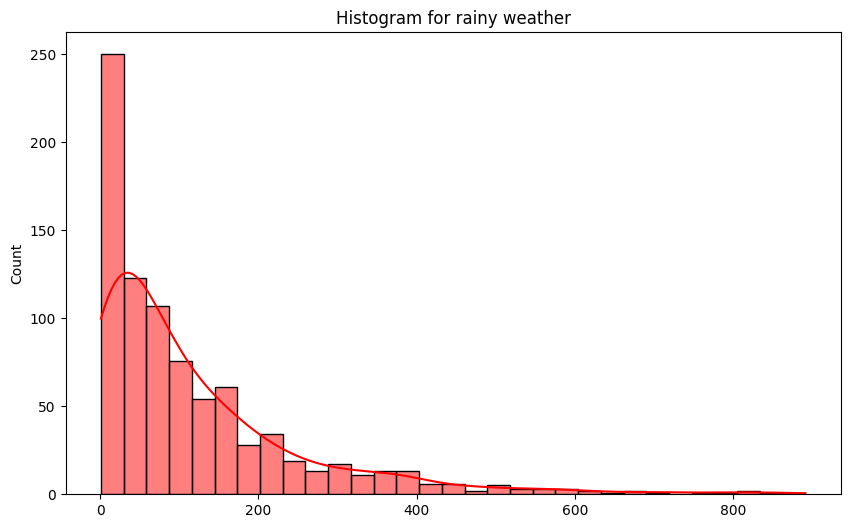

In [ ]:
plt.figure(figsize = (10,6))
sns.histplot(rain,kde = True, color = 'red')
plt.title('Histogram for rainy weather')
plt.show()

<Figure size 1000x600 with 0 Axes>

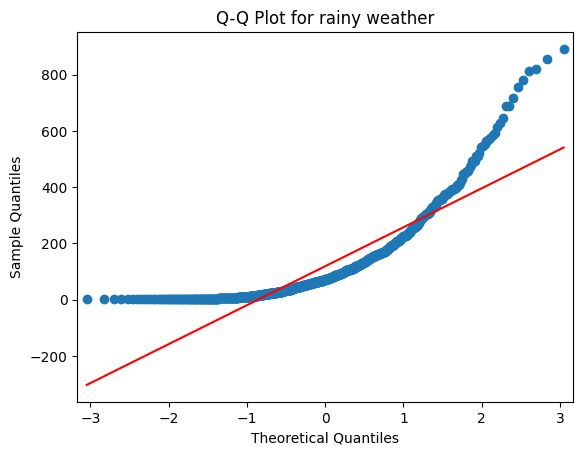

In [ ]:
plt.figure(figsize = (10,6))
qqplot(rain, line = 's')
plt.title('Q-Q Plot for rainy weather')
plt.show()

In [ ]:
#Shapiro-Wilk test
stat,p_value = shapiro(rain)
print(f'Shapiro-Wilk Test p-value for intense Weather: {p_value}')

Shapiro-Wilk Test p-value for intense Weather: 3.876090133422781e-33


###4) Intense weather

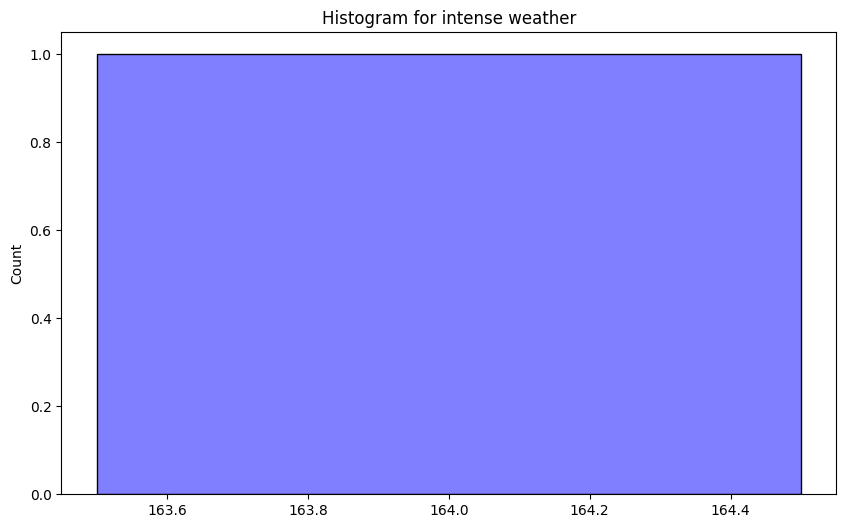

In [ ]:
plt.figure(figsize = (10,6))
sns.histplot(intense,kde = True, color = 'blue')
plt.title('Histogram for intense weather')
plt.show()

<Figure size 1000x600 with 0 Axes>

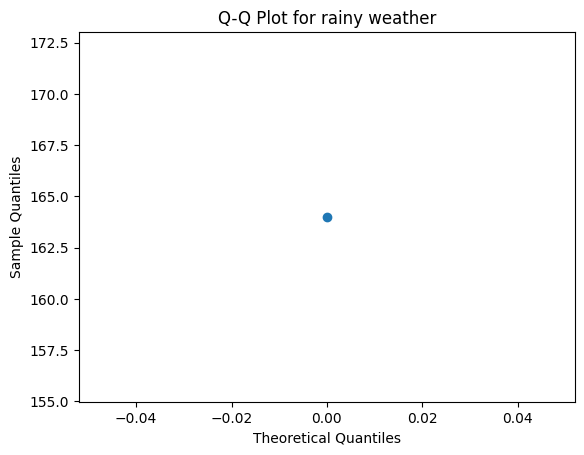

In [ ]:
plt.figure(figsize = (10,6))
qqplot(intense, line = 's')
plt.title('Q-Q Plot for rainy weather')
plt.show()

In [ ]:
#Shapiro-Wilk test
stat,p_value = shapiro(intense)
print(f'Shapiro-Wilk Test p-value for intense Weather: {p_value}')

ValueError: Data must be at least length 3.

ValueError: Data must be at least length 3.

Insight - The Shapiro-Wilk test for normality, implemented through the
'Shapiro' function in Python, requires a minimum of 3 data points.We
are getting the valueError - Data must be at least length 3, suggesting
that our dataset might have fewer than 3 data points.

###ii. Equality Variance

In [ ]:
stat, p_value = levene(clear, partly_clear, rain, intense)
print(f'Levene\'s Test p-value for Equality of Variance: {p_value}')

Levene's Test p-value for Equality of Variance: 3.504937946833238e-35


##Step 4) Set a significance level and Calculate the test Statistics / p-value.One-way ANOVA

In [ ]:
f_stat, p_value = f_oneway(clear, partly_clear, rain, intense)
alpha = 0.05

##Step-5) Decide whether to accept or reject the Null Hypothesis

In [ ]:
alpha = 0.05
print(f'One-way ANOVA p-value: {p_value}')
if p_value <= alpha:
  print("Reject the Null Hypothesis: There is a significant difference in demand for bicycles based on weather conditions.")
else:
  print("Fail to reject the Null Hypothesis: No significant difference in demand for bicycles based on weather conditions.")

One-way ANOVA p-value: 5.482069475935669e-42
Reject the Null Hypothesis: There is a significant difference in demand for bicycles based on weather conditions.


Insight - With the p-value lower than alpha, we assert that the observed
difference is not by chance. Hence, there is a significant variation in
demand for bicycles based on weather conditions.

#Question 5. Check if the demand of bicycles on rent is the same for different Seasons.

##Step 1) Formulating Null Hypothesis (H0) and Alternate Hypothesis (H1)

Null hypothesis(H0): There is no significant difference in the demand of bicycles for different seasons.

Alternate hypothesis(Ha): There is a significant difference in the demand of bicycles for different seasons.

##Step 2) Select an appropriate test - One - way ANOVA

In [ ]:
winter = np.array(df[df['season'] == 'winter']['count'])
summer = np.array(df[df['season'] == 'summer']['count'])
fall = np.array(df[df['season'] == 'fall']['count'])
spring = np.array(df[df['season'] == 'spring']['count'])

##Step 3) Check assumptions of the test

##i. Normality

###1) Winter Season

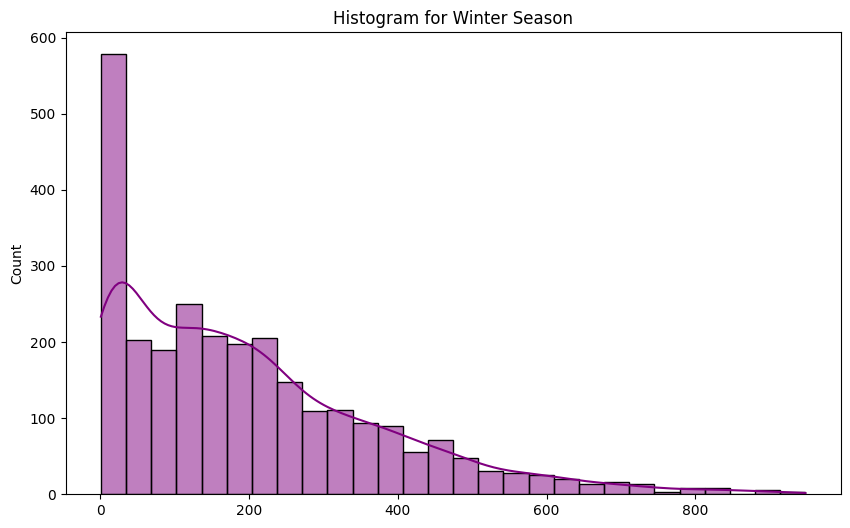

In [ ]:
plt.figure(figsize = (10,6))
sns.histplot(winter, kde = True, color = 'purple')
plt.title('Histogram for Winter Season')
plt.show()

<Figure size 1000x600 with 0 Axes>

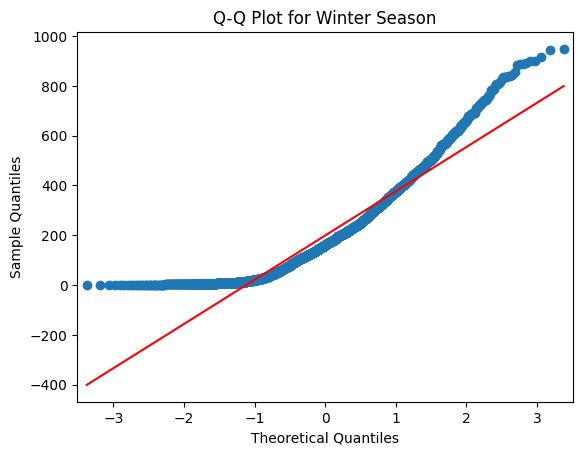

In [ ]:
plt.figure(figsize = (10,6))
qqplot(winter, line = 's')
plt.title('Q-Q Plot for Winter Season')
plt.show()

In [ ]:
# Shapiro-Wilk test
stat, p_value = shapiro(winter)
print(f'Shapiro-Wilk Test p-value for Winter season: {p_value}')

Shapiro-Wilk Test p-value for Winter season: 1.1301682309549298e-39


##2) Summer Season

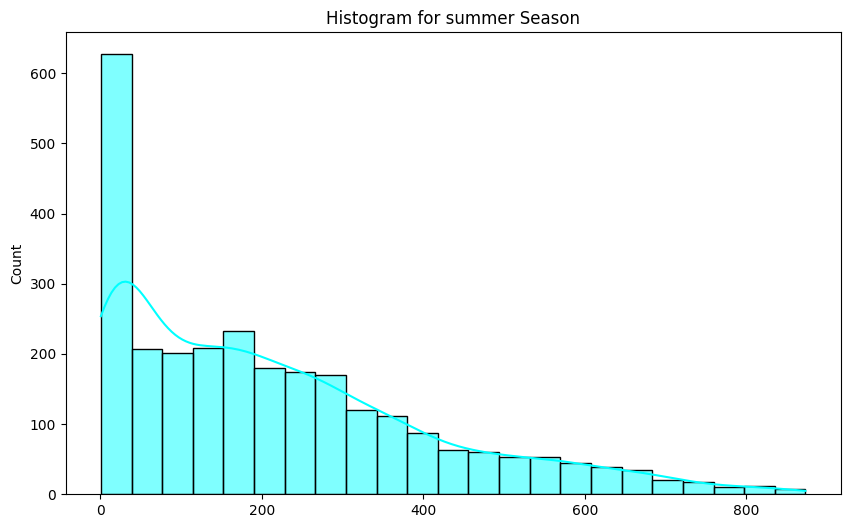

In [ ]:
plt.figure(figsize = (10,6))
sns.histplot(summer, kde = True, color = 'cyan')
plt.title('Histogram for summer Season')
plt.show()

<Figure size 1000x600 with 0 Axes>

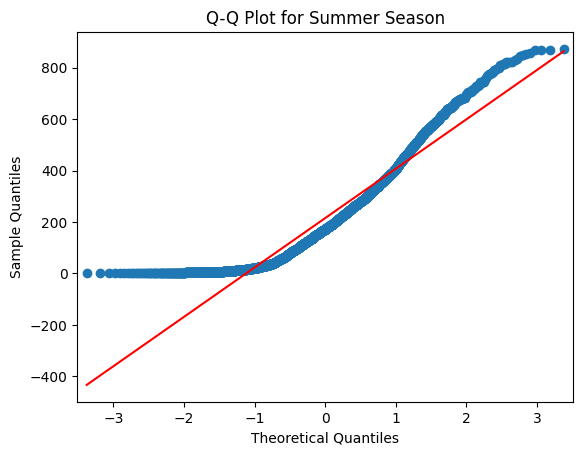

In [ ]:
plt.figure(figsize = (10,6))
qqplot(summer, line = 's')
plt.title('Q-Q Plot for Summer Season')
plt.show()

In [ ]:
stat, p_value = shapiro(summer)
print(f'Shapiro-Wilk Test p-value for Summer Season: {p_value}')

Shapiro-Wilk Test p-value for Summer Season: 6.039093315091269e-39


##3) Fall Season

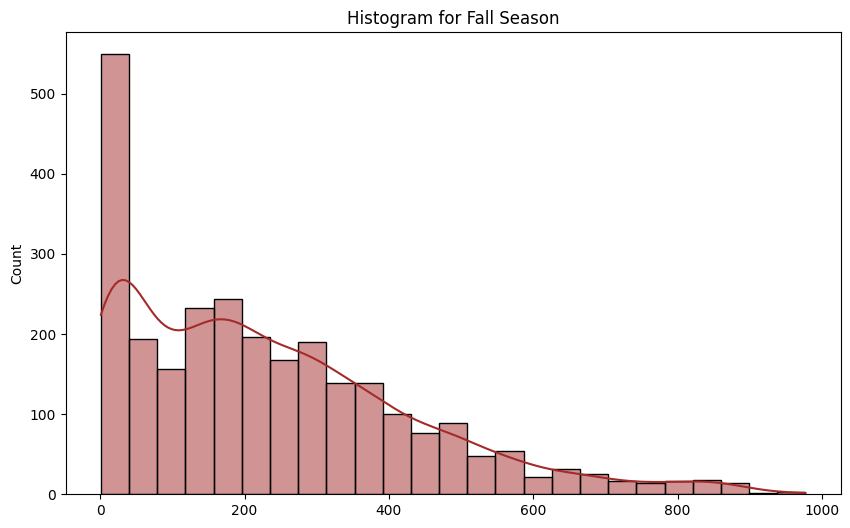

In [ ]:
plt.figure(figsize = (10,6))
sns.histplot(fall, kde = True, color = 'brown')
plt.title('Histogram for Fall Season')
plt.show()

<Figure size 1000x600 with 0 Axes>

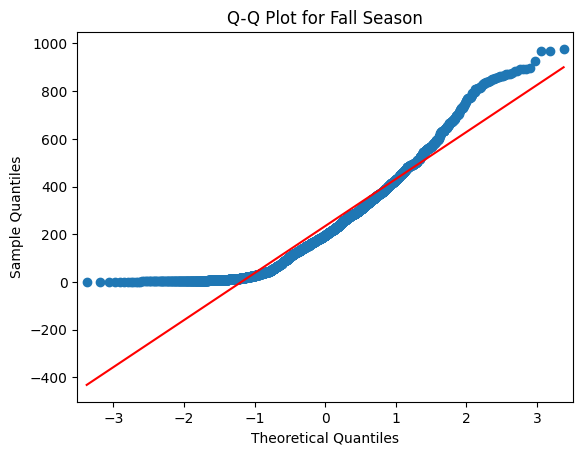

In [ ]:
plt.figure(figsize = (10,6))
qqplot(fall, line = 's')
plt.title('Q-Q Plot for Fall Season')
plt.show()

In [ ]:
# Shapiro-Wilk test
stat, p_value = shapiro(fall)
print(f'Shapiro-Wilk Test p-value for Fall Season: {p_value}')

Shapiro-Wilk Test p-value for Fall Season: 1.043458045587339e-36


##4) Rainy Season

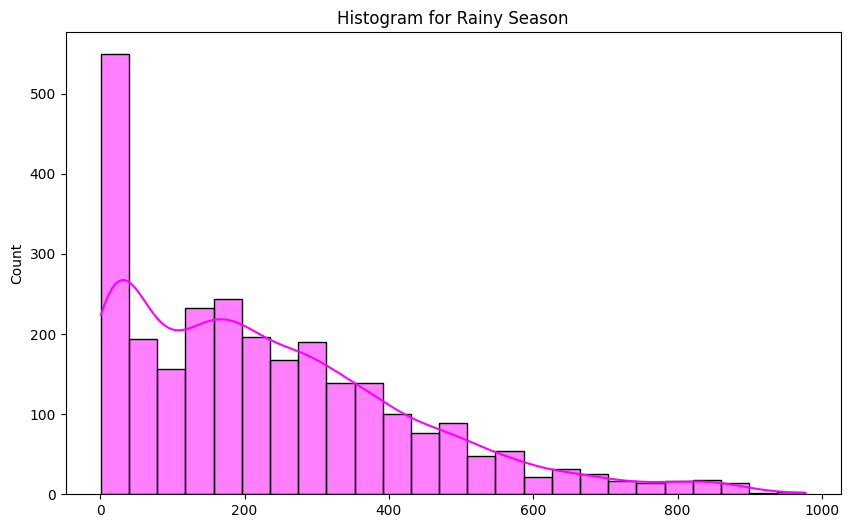

In [ ]:
plt.figure(figsize = (10,6))
sns.histplot(fall, kde = True, color = 'magenta')
plt.title('Histogram for Rainy Season')
plt.show()

<Figure size 1000x600 with 0 Axes>

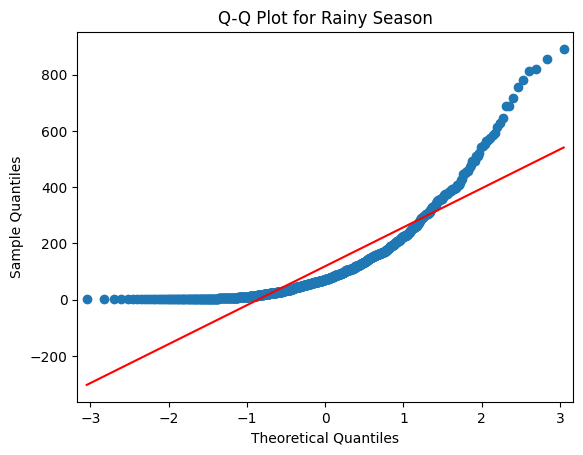

In [ ]:
plt.figure(figsize = (10,6))
qqplot(rain, line = 's')
plt.title('Q-Q Plot for Rainy Season')
plt.show()

In [ ]:
# Shapiro-Wilk test
stat, p_value = shapiro(rain)
print(f'Shapiro-Wilk Test p-value for rainy Season: {p_value}')

Shapiro-Wilk Test p-value for rainy Season: 3.876090133422781e-33


##ii. Equality Variance

In [ ]:
# levene's test
stat, p_value = levene(winter,summer,fall,rain)
print(f'Levene\'s Test p-value for Equality of Variance: {p_value}')

Levene's Test p-value for Equality of Variance: 9.288535992287968e-41


#Step 4) Set a significance level and Calculate the test Statistics / p-value.One-way ANOVA

In [ ]:
f_stat, p_value = f_oneway(winter,summer,fall,rain)
alpha = 0.05
alpha = 0.05
print(f'One-way ANOVA p-value: {p_value}')

One-way ANOVA p-value: 1.6018053944983079e-56


#Step-5) Decide whether to accept or reject the Null Hypothesis

In [ ]:
alpha = 0.05
if p_value <= alpha:
  print("Reject the Null Hypothesis: There is a significant difference in demand for bicycles based on season conditions.")
else:
  print("Fail to reject the Null Hypothesis: No significant difference in demand for bicycles based on season conditions.")

Reject the Null Hypothesis: There is a significant difference in demand for bicycles based on season conditions.


Insight - Since the p-value is found to be lower than alpha we can
conclude that variable season is significant in predicting the demand for
shared electric cycles in the Indian market

#Step 1) Formulating Null Hypothesis (H0) and Alternate Hypothesis (H1)

1. Null Hypothesis(H0): Weather is independent on different seasons.

2. Alternate Hypothesis(Ha): Weather is dependent on different seasons.

#Step 2) Select an appropriate test - Chi-square test

From chi-square test we would use Test of Independence(TOI) as we
have to test whether weather and season are dependent on each other
or not.

#Step 3) Create a Contingency Table against ‘Weather’ & ‘Season’ columns

In [ ]:
cont = pd.crosstab(df['weather'], df['season'])
value = np.array([cont.iloc[0][0:4].values, cont.iloc[1][0:4].values, cont.iloc[2][0:4].values])
cont

season        fall  spring  summer  winter
weather                                   
clear         1930    1759    1801    1702
intense          0       1       0       0
partly_clear   604     715     708     807
rain           199     211     224     225

Insight - We will be dropping the row with the value intense as
frequency/count is less than 3

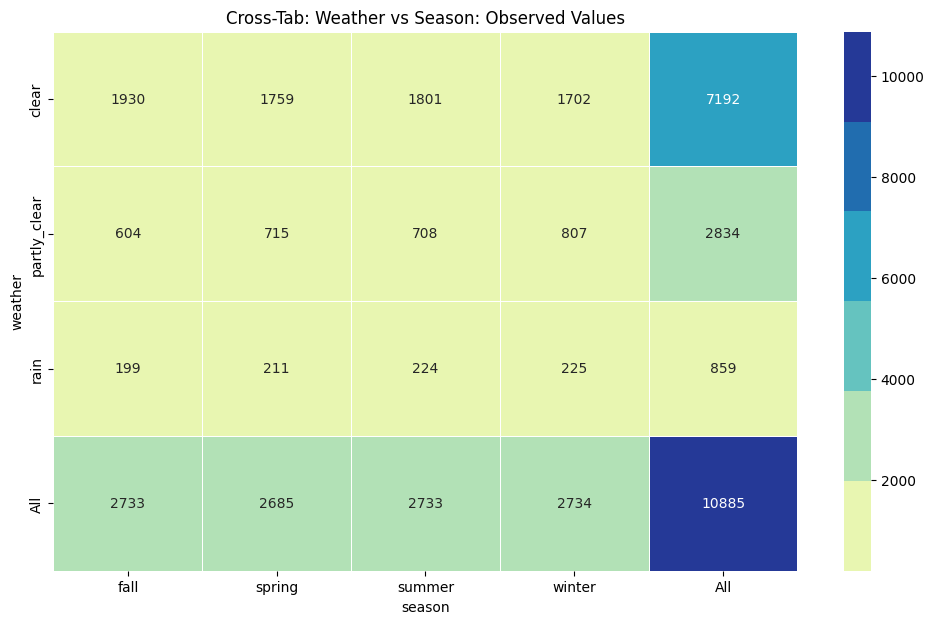

In [ ]:
df = df[df["weather"] != 'intense']
df = pd.crosstab(index=df["weather"], columns=df["season"], margins=True)
colormap = sns.color_palette("YlGnBu")
plt.figure(figsize=(12,7))
plt.title('Cross-Tab: Weather vs Season: Observed Values')
sns.heatmap(df, annot=True, fmt="d", linewidths=.5, linecolor='white', cmap=colormap)  # Added closing parenthesis for cmap
plt.show()


Insight - We dropped the 'intense' weather as frequency/count is less
than 3.

#Step 4) Set a significance level and Calculate the test Statistics / p-value

significance_level = 0.05

#Step 5) Decide whether to accept or reject the Null Hypothesis

In [ ]:
from scipy.stats import chi2_contingency
observed = [[1930, 1759, 1801, 1702],
[604, 715, 708, 807],
[199, 211, 224, 225]]
chi_stat, p_value, df, expected_freq = chi2_contingency(observed)
alpha = 0.05
print('chi-stat:',chi_stat)
print('p-value:',p_value)
print('df:',df)
print("expected-freq:",expected_freq)
if p_value < alpha:
  print('reject H0')
  print('Weather is dependent of seasons')
else:
  print('fail to reject H0')
  print('Weather is independent of seasons.')

chi-stat: 46.101457310732485
p-value: 2.8260014509929403e-08
df: 6
expected-freq: [[1805.76352779 1774.04869086 1805.76352779 1806.42425356]
 [ 711.55920992  699.06201194  711.55920992  711.81956821]
 [ 215.67726229  211.8892972   215.67726229  215.75617823]]
reject H0
Weather is dependent of seasons


Insight - Since, pvalue(2.8260014509929403e-08) is lesser than
Significance Level(α) i.e 0.05, we reject the null hypothesis that is
'weather is independent of season'.This implies that at 95% confidence
level, weather is dependent on seasons.

#INSIGHTS

1. The Yulu dataset spans from January 1, 2011, to December 19, 2012.

2. The total count of Yulu electric bicycle riders is 10,886.

3. Casual Cycles rented on Weekends are higher than Registered cycles rented on weekends.

4. Registered cycles rented on working days are higher than casual cycles rented on working days.

5. Demand for rented electric bicycles is relatively equal in all seasons, with a slight increase observed during winter and the lowest count in summer.

6. A pie plot reveals that 66.07% of riders prefer clear weather for bicycle rides.

7. The majority of Yulu bicycle riders fall within the count range of 0-300.

8. Holidays show no significant effect on the number of rented bicycles.

9. Working days also exhibit no significant impact on the bicycle rental count.

10. No significant difference is observed in the number of bike rides between weekdays and weekends.

11. There is a notable variation in bicycle demand based on different weather conditions.

12. The variable "season" is a significant predictor of shared electric cycle demand in the Indian market.

13. At a 95% confidence level, weather is dependent on seasons therefore it is significant in predicting the demand for shared electric cycles in the Indian market.

#RECOMMENDATIONS

1. Develop targeted marketing campaigns aligned with seasonal trends. Promotions and discounts during peak demand seasons, especially in winter, can attract more users.

2. Leverage the insight that clear weather is preferred by a significant percentage of riders. Implement weather-aware promotions or incentives to encourage more rides during favorable conditions.3. Consider differentiated pricing strategies for weekends and working days. Since
registered cycles are more popular on working days, offering promotions or reduced rates for casual cycles on weekdays could balance demand.

4. Plan for increased capacity during weekends to meet the higher demand for casual cycles. Adjust the fleet distribution based on historical data on casual and registered cycle usage.

5. Conduct awareness campaigns to educate users on the benefits of using Yulu bicycles during all seasons. Emphasize the convenience and environmental advantages to attract a diverse user base.

6. Identify and expand operations in areas where demand consistently falls within the 0-300 range. This could involve increasing the number of bicycles available or establishing new Yulu zones.

7. Implement a system for continuous monitoring of user preferences and rental patterns. Use this data to adapt strategies, promotions, and fleet distribution in real- time.

8. Since registered cycles are more popular on working days, consider partnerships or collaborations with corporate offices to promote Yulu usage among employees.

9. Enhance the Yulu mobile app with weather updates and real-time information on bicycle availability. This can help users make informed decisions based on weather conditions.

10. Foster a sense of community among Yulu users by organizing events or initiatives that bring riders together. This can enhance user loyalty and create a positive impact on demand.